# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 598


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        weather_json = city_weather.json()

       # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = weather_json["coord"]["lat"]
        city_lng = weather_json["coord"]["lon"]
        city_max_temp = weather_json["main"]["temp_max"]
        city_humidity = weather_json["main"]["humidity"]
        city_clouds = weather_json["clouds"]["all"]
        city_wind = weather_json["wind"]["speed"]
        city_country = weather_json["sys"]["country"]
        city_date = weather_json["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | college
Processing Record 2 of Set 1 | utrik
Processing Record 3 of Set 1 | hami
Processing Record 4 of Set 1 | iqaluit
Processing Record 5 of Set 1 | wailua homesteads
Processing Record 6 of Set 1 | kristiansund
Processing Record 7 of Set 1 | luanda
Processing Record 8 of Set 1 | taroa
Processing Record 9 of Set 1 | xilin hot
Processing Record 10 of Set 1 | odda
Processing Record 11 of Set 1 | vorgashor
Processing Record 12 of Set 1 | margaret river
Processing Record 13 of Set 1 | waitangi
Processing Record 14 of Set 1 | fort leonard wood
Processing Record 15 of Set 1 | puerto ayora
Processing Record 16 of Set 1 | klyuchi
Processing Record 17 of Set 1 | ola
Processing Record 18 of Set 1 | zaysan
Processing Record 19 of Set 1 | adamstown
Processing Record 20 of Set 1 | grytviken
Processing Record 21 of Set 1 | asekeyevo
Processing Record 22 of Set 1 | kati
Processing Record 23 of Set 1 | puerto n

Processing Record 39 of Set 4 | fannuj
City not found. Skipping...
Processing Record 40 of Set 4 | alice springs
Processing Record 41 of Set 4 | cockburn town
Processing Record 42 of Set 4 | ihosy
Processing Record 43 of Set 4 | caleta de carquin
Processing Record 44 of Set 4 | kudat
Processing Record 45 of Set 4 | st. john's
Processing Record 46 of Set 4 | pisco
Processing Record 47 of Set 4 | kingston
Processing Record 48 of Set 4 | ijuw
City not found. Skipping...
Processing Record 49 of Set 4 | simpang
Processing Record 0 of Set 5 | raduzhny
Processing Record 1 of Set 5 | touros
Processing Record 2 of Set 5 | georgetown
Processing Record 3 of Set 5 | tangalle
Processing Record 4 of Set 5 | cooma
Processing Record 5 of Set 5 | roma
Processing Record 6 of Set 5 | afaahiti
Processing Record 7 of Set 5 | basse-terre
Processing Record 8 of Set 5 | toliara
Processing Record 9 of Set 5 | flying fish cove
Processing Record 10 of Set 5 | alofi
Processing Record 11 of Set 5 | kupang
Processi

Processing Record 32 of Set 8 | san-pedro
Processing Record 33 of Set 8 | achinsk
Processing Record 34 of Set 8 | island harbour
Processing Record 35 of Set 8 | qamdo
Processing Record 36 of Set 8 | holualoa
Processing Record 37 of Set 8 | kerouane
Processing Record 38 of Set 8 | mwinilunga
Processing Record 39 of Set 8 | ancud
Processing Record 40 of Set 8 | sandnessjoen
Processing Record 41 of Set 8 | almunecar
Processing Record 42 of Set 8 | molde
Processing Record 43 of Set 8 | el sauzal de rodriguez
Processing Record 44 of Set 8 | turpan
Processing Record 45 of Set 8 | estevan
Processing Record 46 of Set 8 | parham
Processing Record 47 of Set 8 | bamboo flat
Processing Record 48 of Set 8 | amurzet
Processing Record 49 of Set 8 | shiyan
Processing Record 0 of Set 9 | ulimang
Processing Record 1 of Set 9 | shenkursk
Processing Record 2 of Set 9 | cromer
Processing Record 3 of Set 9 | beidaihehaibin
Processing Record 4 of Set 9 | nuuk
Processing Record 5 of Set 9 | northam
Processing

Processing Record 19 of Set 12 | laayoune plage
City not found. Skipping...
Processing Record 20 of Set 12 | uturoa
Processing Record 21 of Set 12 | masumbwe
Processing Record 22 of Set 12 | illapel
Processing Record 23 of Set 12 | chipinge
Processing Record 24 of Set 12 | taoudenni
Processing Record 25 of Set 12 | khandyga
Processing Record 26 of Set 12 | glace bay
Processing Record 27 of Set 12 | bamiantong
Processing Record 28 of Set 12 | myshkin
Processing Record 29 of Set 12 | qarazhal
Processing Record 30 of Set 12 | san agustin de valle fertil
Processing Record 31 of Set 12 | brookings
Processing Record 32 of Set 12 | baganga
Processing Record 33 of Set 12 | morehead city
Processing Record 34 of Set 12 | stijena
Processing Record 35 of Set 12 | abraham's bay
City not found. Skipping...
Processing Record 36 of Set 12 | lorengau
Processing Record 37 of Set 12 | den burg
Processing Record 38 of Set 12 | kas
Processing Record 39 of Set 12 | nova gradiska
Processing Record 40 of Set 

In [4]:
# Convert the cities weather data into a Pandas DataFrame, list to dataframe
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,college,64.8569,-147.8028,-2.03,86,75,0.00,US,1698692402
1,utrik,11.2278,169.8474,28.09,80,100,9.22,MH,1698692403
2,hami,42.8000,93.4500,11.13,41,16,0.39,CN,1698692404
3,iqaluit,63.7506,-68.5145,-10.15,72,75,6.71,CA,1698692406
4,wailua homesteads,22.0669,-159.3780,24.86,94,91,1.34,US,1698692408


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,college,64.8569,-147.8028,-2.03,86,75,0.00,US,1698692402
1,utrik,11.2278,169.8474,28.09,80,100,9.22,MH,1698692403
2,hami,42.8000,93.4500,11.13,41,16,0.39,CN,1698692404
3,iqaluit,63.7506,-68.5145,-10.15,72,75,6.71,CA,1698692406
4,wailua homesteads,22.0669,-159.3780,24.86,94,91,1.34,US,1698692408


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

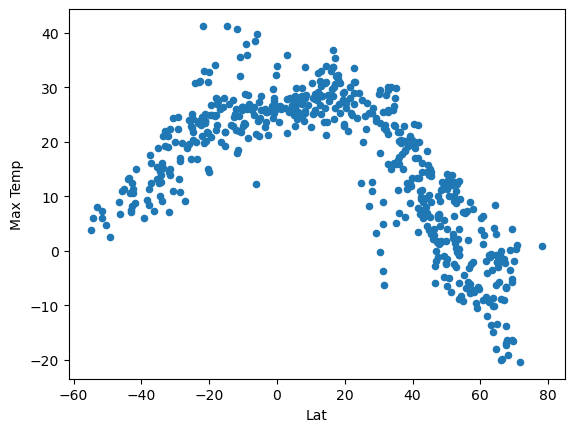

In [12]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot.scatter(x='Lat', y='Max Temp')

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

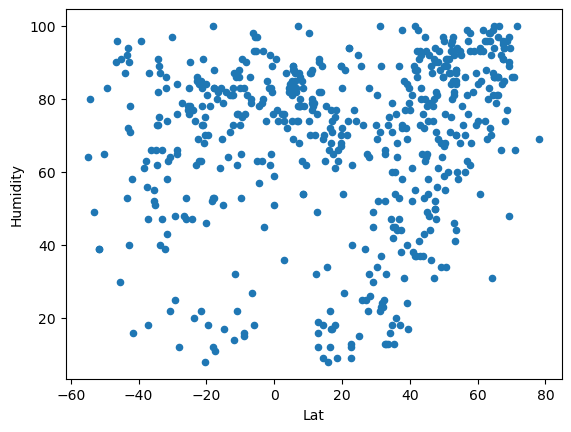

In [13]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot.scatter(x='Lat', y='Humidity')

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

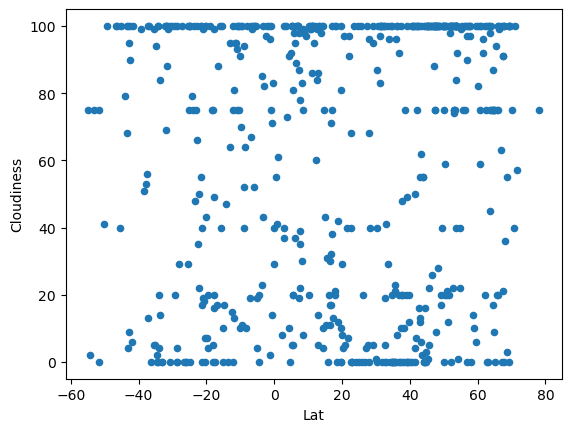

In [14]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot.scatter(x='Lat', y='Cloudiness')

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

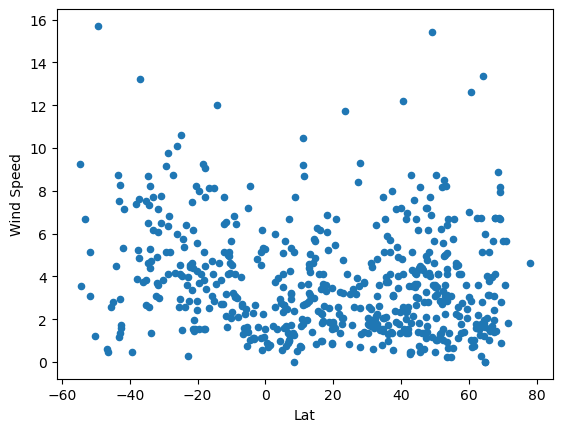

In [15]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot.scatter(x='Lat', y='Wind Speed')

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [20]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(
    city_data_df["Lat"] > 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,college,64.8569,-147.8028,-2.03,86,75,0.00,US,1698692402
1,utrik,11.2278,169.8474,28.09,80,100,9.22,MH,1698692403
2,hami,42.8000,93.4500,11.13,41,16,0.39,CN,1698692404
3,iqaluit,63.7506,-68.5145,-10.15,72,75,6.71,CA,1698692406
4,wailua homesteads,22.0669,-159.3780,24.86,94,91,1.34,US,1698692408


In [21]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(
    city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
6,luanda,-8.8368,13.2343,26.00,83,40,4.12,AO,1698692410
11,margaret river,-33.9500,115.0667,9.06,89,4,4.39,AU,1698692417
12,waitangi,-43.9535,-176.5597,13.23,87,79,4.47,NZ,1698692417
14,puerto ayora,-0.7393,-90.3518,27.98,89,71,2.24,EC,1698692419
18,adamstown,-25.0660,-130.1015,22.58,76,100,4.54,PN,1698692421


###  Temperature vs. Latitude Linear Regression Plot

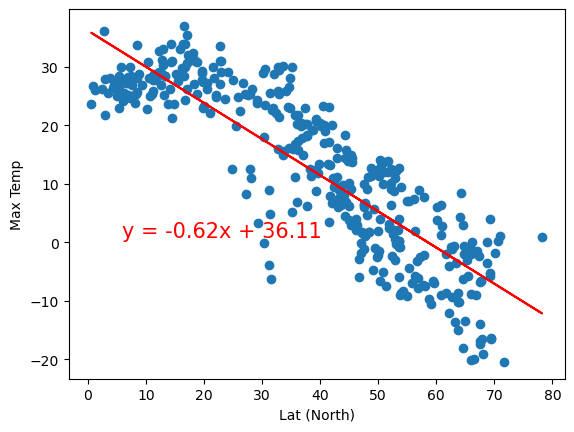

y = -0.62x + 36.11


In [50]:
# Linear regression on Northern Hemisphere

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Lat (North)')
plt.ylabel('Max Temp')
plt.savefig("output_data/Fig5.png")
plt.show()
print(line_eq)


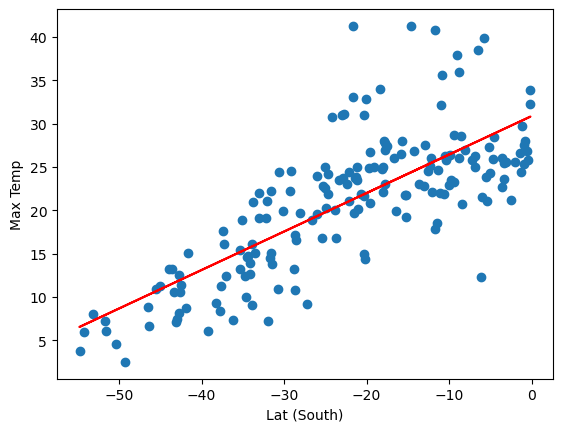

y = 0.44x + 30.87


In [51]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,10),fontsize=15,color="red")
plt.xlabel('Lat (South)')
plt.ylabel('Max Temp')
plt.savefig("output_data/Fig6.png")
plt.show()
print(line_eq)

**Discussion about the linear relationship:** The northern hemisphere has a negative correlation while the southern hemisphere has a weak positive correlation

### Humidity vs. Latitude Linear Regression Plot

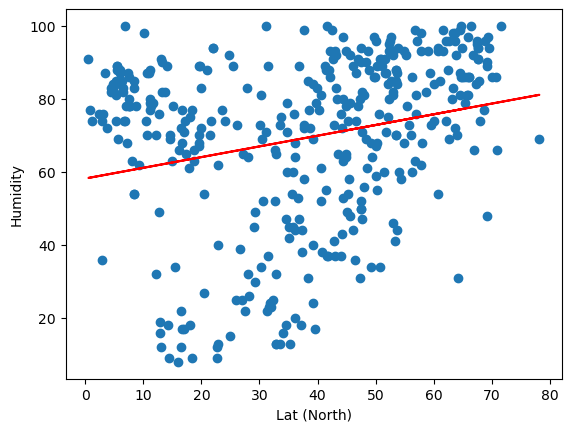

y = 0.29x + 58.22


In [52]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Lat (North)')
plt.ylabel('Humidity')
plt.savefig("output_data/Fig7.png")
plt.show()
print(line_eq)

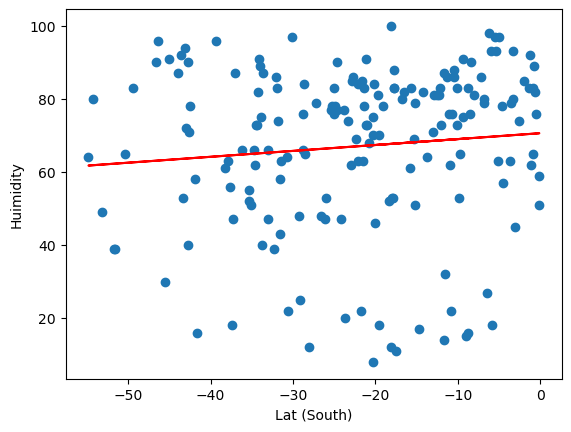

y = 0.16x + 70.63


In [53]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Lat (South)')
plt.ylabel('Huimidity')
plt.savefig("output_data/Fig8.png")
plt.show()
print(line_eq)

**Discussion about the linear relationship:** Both North and South hemispheres have weak positive correlations

### Cloudiness vs. Latitude Linear Regression Plot

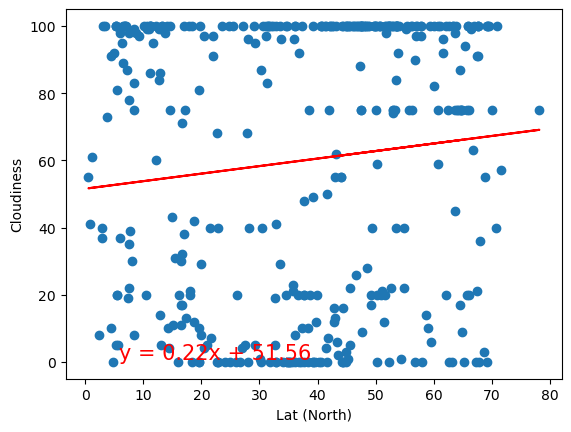

y = 0.22x + 51.56


In [54]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Lat (North)')
plt.ylabel('Cloudiness')
plt.savefig("output_data/Fig9.png")
plt.show()
print(line_eq)

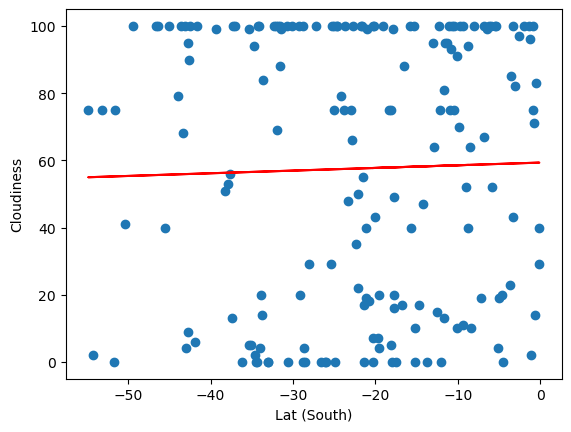

y = 0.08x + 59.33


In [55]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Lat (South)')
plt.ylabel('Cloudiness')
plt.savefig("output_data/Fig10.png")
plt.show()
print(line_eq)

**Discussion about the linear relationship:** Both hemispheres have weak positive correlations

### Wind Speed vs. Latitude Linear Regression Plot

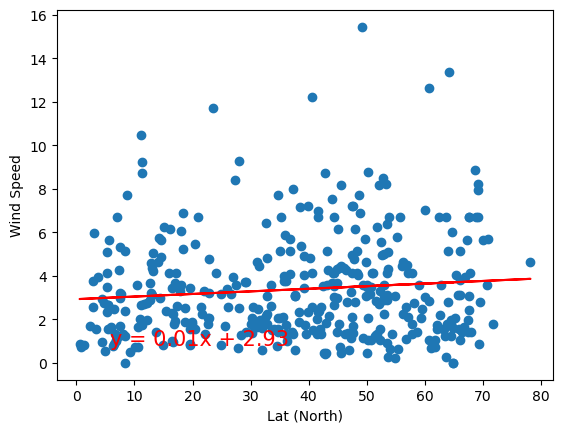

y = 0.01x + 2.93


In [56]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Lat (North)')
plt.ylabel('Wind Speed')
plt.savefig("output_data/Fig11.png")
plt.show()
print(line_eq)

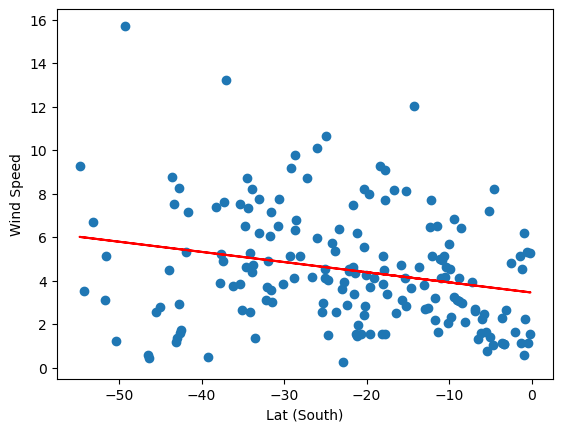

y = -0.05x + 3.45


In [57]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Lat (South)')
plt.ylabel('Wind Speed')
plt.savefig("output_data/Fig12.png")
plt.show()
print(line_eq)

**Discussion about the linear relationship:** Both hemispheres have weak correlations